In [1]:
%config IPCompleter.greedy=True
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules


In [2]:
df = pd.read_excel('Online Retail.xlsx')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [4]:
# clean df 1 line 1 word
df['Description'] = df['Description'].str.strip()
df.dropna(axis=0, subset=['InvoiceNo'], inplace=True)
df['InvoiceNo']= df['InvoiceNo'].astype('str')

In [6]:
df.head(143)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
138,536381,22778,GLASS CLOCHE SMALL,3,2010-12-01 09:41:00,3.95,15311.0,United Kingdom
139,536381,22719,GUMBALL MONOCHROME COAT RACK,36,2010-12-01 09:41:00,1.06,15311.0,United Kingdom
140,536381,21523,DOORMAT FANCY FONT HOME SWEET HOME,10,2010-12-01 09:41:00,6.75,15311.0,United Kingdom
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom


In [7]:
df[df.InvoiceNo.str.contains('C', na=False)].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


In [8]:
# delete invoiceNo has 'C'
df = df[~df['InvoiceNo'].str.contains('C')]

In [9]:
df[df.InvoiceNo.str.contains('C', na=False)].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


<AxesSubplot:>

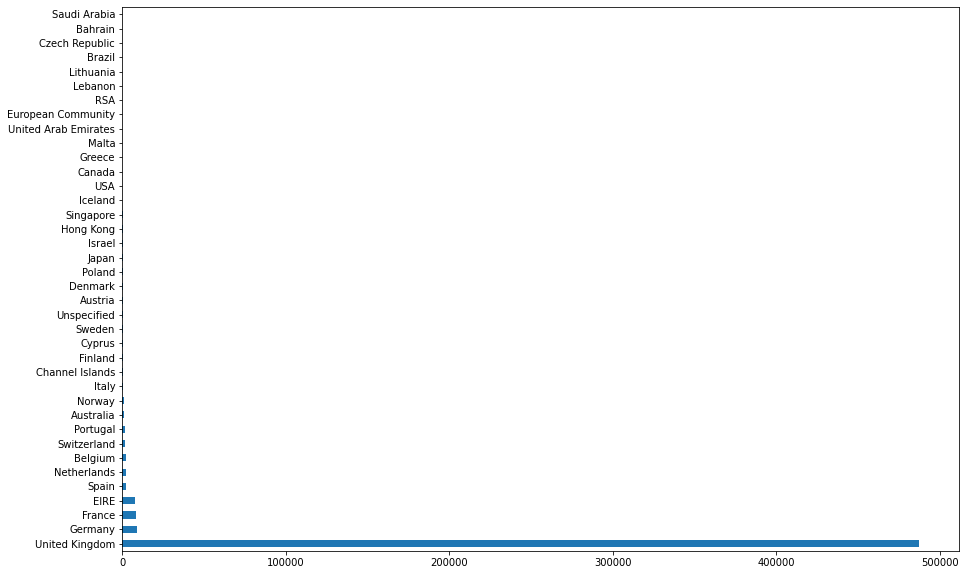

In [10]:
# Thống kê số dòng dữ liệu theo từng quốc gia
# kind = 'barh' is this table, beside read in doc
df['Country'].value_counts().plot(kind='barh', figsize=(15,10))

In [11]:
# Chỉ xét các hóa đơn từ nước Anh và nhóm dữ liệu theo Số hóa đơn và Tên mặt hàng
basket = df[df['Country'] == 'France'].groupby(['InvoiceNo', 'Description'])['Quantity']

In [12]:
basket.head(10)

26        24
27        24
28        12
29        12
30        24
          ..
541904    12
541905     6
541906     4
541907     4
541908     3
Name: Quantity, Length: 8408, dtype: int64

In [13]:
# combine to code hot encoding
basket = basket.sum().unstack().reset_index().fillna(0).set_index('InvoiceNo')

In [14]:
basket.head(100)

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,...,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
548553,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
548606,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
# Tạo hàm biến đổi mỗi điểm dữ liệu có số lượng (Quantity) lớn hơn 0 thành 1
def encode_data(datapoint):
    if datapoint <= 0:
        return 0
    if datapoint >=1:
        return 1

In [16]:
# Chuyển đổi dữ liệu từ dạng hot encoding thành one-hot encoding
basket = basket.applymap(encode_data)

In [17]:
# delete row 'POSTAGE'
basket.drop('POSTAGE', inplace=True, axis=1)

In [22]:
# Áp dụng thuật toán Apriori với min_sup = 7% để tìm tập phổ biến
itemsets = apriori(basket, min_support=0.07, use_colnames=True)

In [23]:
itemsets.head(10)

,support,itemsets
0,0.071429,(4 TRADITIONAL SPINNING TOPS)
1,0.096939,(ALARM CLOCK BAKELIKE GREEN)
2,0.102041,(ALARM CLOCK BAKELIKE PINK)
3,0.094388,(ALARM CLOCK BAKELIKE RED)
4,0.081633,(BAKING SET 9 PIECE RETROSPOT)
5,0.071429,(CHILDRENS CUTLERY DOLLY GIRL)
6,0.099490,(DOLLY GIRL LUNCH BOX)
7,0.096939,(JUMBO BAG RED RETROSPOT)
8,0.076531,(JUMBO BAG WOODLAND ANIMALS)
9,0.125000,(LUNCH BAG APPLE DESIGN)


In [24]:
# Tạo luật kết hợp với min_conf = 70%
rules = association_rules(itemsets, metric='confidence', min_threshold=0.7)

In [25]:
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE GREEN),0.102041,0.096939,0.073980,0.725000,7.478947,0.064088,3.283859
1,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE PINK),0.096939,0.102041,0.073980,0.763158,7.478947,0.064088,3.791383
2,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.094388,0.096939,0.079082,0.837838,8.642959,0.069932,5.568878
3,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.096939,0.094388,0.079082,0.815789,8.642959,0.069932,4.916181
4,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE RED),0.102041,0.094388,0.073980,0.725000,7.681081,0.064348,3.293135
5,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE PINK),0.094388,0.102041,0.073980,0.783784,7.681081,0.064348,4.153061
6,(DOLLY GIRL LUNCH BOX),(SPACEBOY LUNCH BOX),0.099490,0.125000,0.071429,0.717949,5.743590,0.058992,3.102273
7,(PLASTERS IN TIN SPACEBOY),(PLASTERS IN TIN WOODLAND ANIMALS),0.137755,0.170918,0.104592,0.759259,4.442233,0.081047,3.443878
8,(SET/6 RED SPOTTY PAPER CUPS),(SET/20 RED RETROSPOT PAPER NAPKINS),0.137755,0.132653,0.102041,0.740741,5.584046,0.083767,3.345481
9,(SET/20 RED RETROSPOT PAPER NAPKINS),(SET/6 RED SPOTTY PAPER CUPS),0.132653,0.137755,0.102041,0.769231,5.584046,0.083767,3.736395


In [26]:
# Chuyển đổi vế trái và vế phải từ kiểu object (frozenset) về kiểu chuỗi (unicode)
rules['antecedents'] = rules['antecedents'].apply(lambda x: list(x)[0]).astype('unicode')
rules['consequents'] = rules['consequents'].apply(lambda x: list(x)[0]).astype('unicode')

In [27]:
# Viết lệnh in ra các luật đã tìm được
for i in range(len(rules)):
    print(rules.loc[i, 'antecedents'], ' ==> ', rules.loc[i, 'consequents'],
                   ' [', rules.loc[i, 'support'], ', ', rules.loc[i, 'confidence'], ']')

ALARM CLOCK BAKELIKE PINK  ==>  ALARM CLOCK BAKELIKE GREEN  [ 0.07397959183673469 ,  0.725 ]
ALARM CLOCK BAKELIKE GREEN  ==>  ALARM CLOCK BAKELIKE PINK  [ 0.07397959183673469 ,  0.7631578947368421 ]
ALARM CLOCK BAKELIKE RED  ==>  ALARM CLOCK BAKELIKE GREEN  [ 0.07908163265306123 ,  0.8378378378378379 ]
ALARM CLOCK BAKELIKE GREEN  ==>  ALARM CLOCK BAKELIKE RED  [ 0.07908163265306123 ,  0.8157894736842106 ]
ALARM CLOCK BAKELIKE PINK  ==>  ALARM CLOCK BAKELIKE RED  [ 0.07397959183673469 ,  0.725 ]
ALARM CLOCK BAKELIKE RED  ==>  ALARM CLOCK BAKELIKE PINK  [ 0.07397959183673469 ,  0.7837837837837838 ]
DOLLY GIRL LUNCH BOX  ==>  SPACEBOY LUNCH BOX  [ 0.07142857142857142 ,  0.717948717948718 ]
PLASTERS IN TIN SPACEBOY  ==>  PLASTERS IN TIN WOODLAND ANIMALS  [ 0.10459183673469388 ,  0.7592592592592594 ]
SET/6 RED SPOTTY PAPER CUPS  ==>  SET/20 RED RETROSPOT PAPER NAPKINS  [ 0.10204081632653061 ,  0.7407407407407408 ]
SET/20 RED RETROSPOT PAPER NAPKINS  ==>  SET/6 RED SPOTTY PAPER CUPS  [ 0.102

<AxesSubplot:title={'center':'Association Rules'}, xlabel='support', ylabel='confidence'>

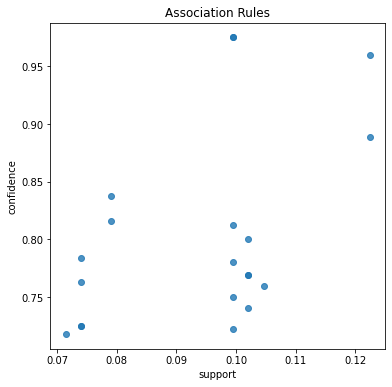

In [28]:
# Lấy giá trị độ hỗ trợ và độ tin cậy của tập luật
# and Biểu diễn các thông tin này lên biểu đồ
support=rules['support'].values
confidence=rules['confidence'].values

plt.figure(figsize=(6, 6))
plt.title('Association Rules')
plt.xlabel('support')
plt.ylabel('confidence')
sns.regplot(x=support, y=confidence, fit_reg=False)